In [84]:
import pandas as pd
import sqlite3

con = sqlite3.connect('main.db')

penguins = sns.load_dataset("penguins")
# print(penguins.head())

c_projects_sql = '''
select name,size_mb from proj_summary where language='C' and size_mb < 200 order by 2;
'''

# data_sql = 'select * from files where project_id in (1,2) order by 1'
# data_sql = 'select * from files where project_id <= 5'
# data_sql = '''
# select projects.name as project_name, path, byte_count
# from files, projects
# on files.project_id = projects.id
# where project_id in (1,2);
# '''
data_sql = '''
select projects.name as project_name, path, byte_count
from files, projects, proj_summary psum
on files.project_id = projects.id
and projects.name = psum.name
where language='C' and size_mb < 200
'''
df = pd.read_sql(data_sql, con)
print(df.tail())


     project_name                              path  byte_count
3259      cpython       Tools/unicode/listcodecs.py        1021
3260      cpython  Tools/unicode/makeunicodedata.py       48657
3261      cpython     Tools/unicode/mkstringprep.py       10184
3262      cpython  Tools/unittestgui/unittestgui.py       18560
3263      cpython                          setup.py      111185


In [85]:
import seaborn as sns
import matplotlib.pyplot as plt  # TODO: remove?

# PLOT STYLE AND GLOBALS
#
# context = scaling; theme = visuals; style = general things
sns.set_theme(context='talk', palette='rainbow', font_scale=0.8)

# - palette: deep, muted, bright, pastel, dark, colorblind
# sns.set_palette("colorblind")
# sns.set_context("notebook", font_scale=1.5)


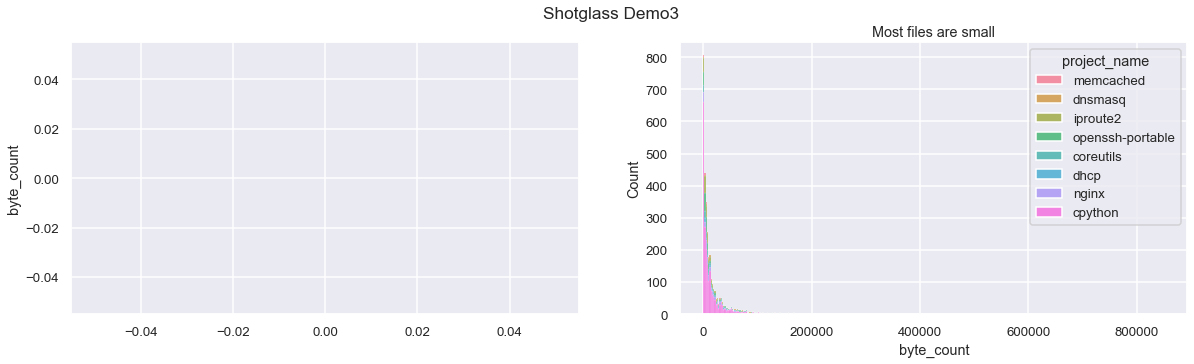

In [86]:
# actual plots

fig, axs = plt.subplots(ncols=2, figsize=(20,5))
fig.suptitle('Shotglass Demo3')

if 1:
    hist_p = sns.histplot(data=df, x="byte_count", hue="project_name", multiple="stack")
    hist_p.set(title="Most files are small")

if 1:
    sns.lineplot(y="byte_count", data=df, ax=axs[0])

# Resources

## Seaborn
* https://seaborn.pydata.org/examples/horizontal_boxplot.html

## Pandas
* intro https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html
* https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-formatting
* https://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html
* https://pandas.pydata.org/pandas-docs/version/0.18.1/cookbook.html#cookbook-plotting